In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.coordinates import SkyCoord
import matplotlib.patches as patches
import astropy.units as u
from astropy.io import fits
import seaborn as sns
from astropy.io import ascii
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('NNresults_Galah_Dwarf_Teff.csv')

In [145]:
df.columns

Index(['#ID', 'RA', 'DEC', 'u', 'J378', 'J395', 'J410', 'J430', 'g', 'J515',
       'r', 'J660', 'i', 'J861', 'z', 'Teff', 'Logg', '[Fe/H]', 'Line_Label',
       'split', 'Teff.1', 'RFpredict_Teff', 'NNpredict_Teff'],
      dtype='object')

In [6]:
def equation(m, c, x):
    # Define your equation here, for example, a linear equation: y = mx + c
    y = m * x + c
    return y

In [135]:
# Generate x values
x_values = np.linspace(-10, 10000, 10)  # Generate 100 x values from 0 to 10

# Compute y values using the equation
y_values = equation(1.2, 100, x_values)

In [136]:
#y = 1.667x - 1834.5

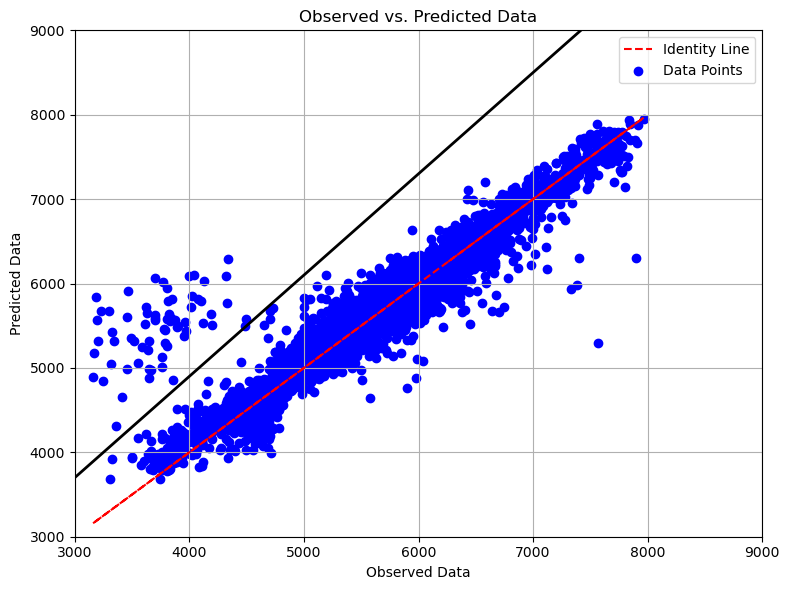

In [140]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df["Teff"], df["NNpredict_Teff"], color='blue', label='Data Points')
plt.plot(df["Teff"], df["Teff"], color='red', linestyle='--', label='Identity Line')

plt.plot(x_values, y_values, linewidth=2, color="k")
plt.xlim(3000, 9e3)
plt.ylim(3000, 9e3)
plt.title('Observed vs. Predicted Data')
plt.xlabel('Observed Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [149]:
# upper_line = rj660 < equation(ri)
crit_upper = (df["NNpredict_Teff"] >= 1.2*df["Teff"] + 100)

In [156]:
df_upper = df[crit_upper]
len(df_upper)

68

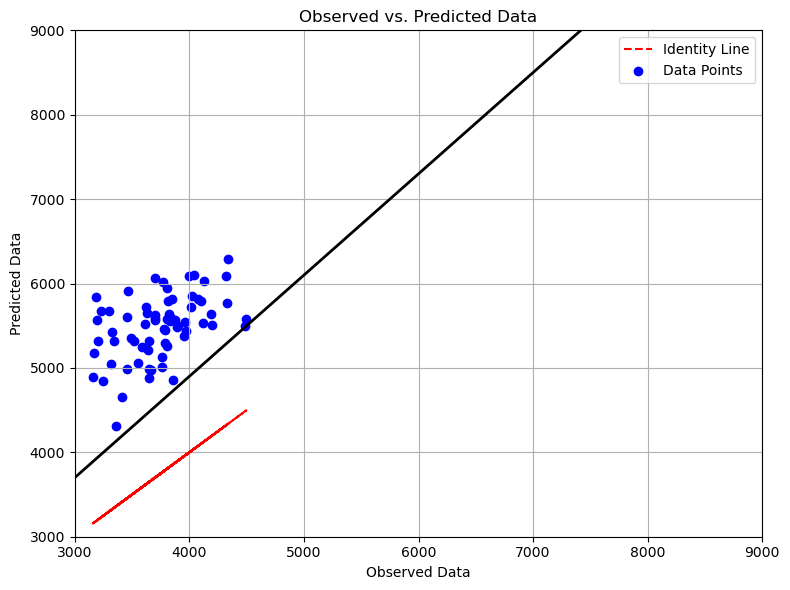

In [151]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df_upper["Teff"], df_upper["NNpredict_Teff"], color='blue', label='Data Points')
plt.plot(df_upper["Teff"], df_upper["Teff"], color='red', linestyle='--', label='Identity Line')

plt.plot(x_values, y_values, linewidth=2, color="k")
plt.xlim(3000, 9e3)
plt.ylim(3000, 9e3)
plt.title('Observed vs. Predicted Data')
plt.xlabel('Observed Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

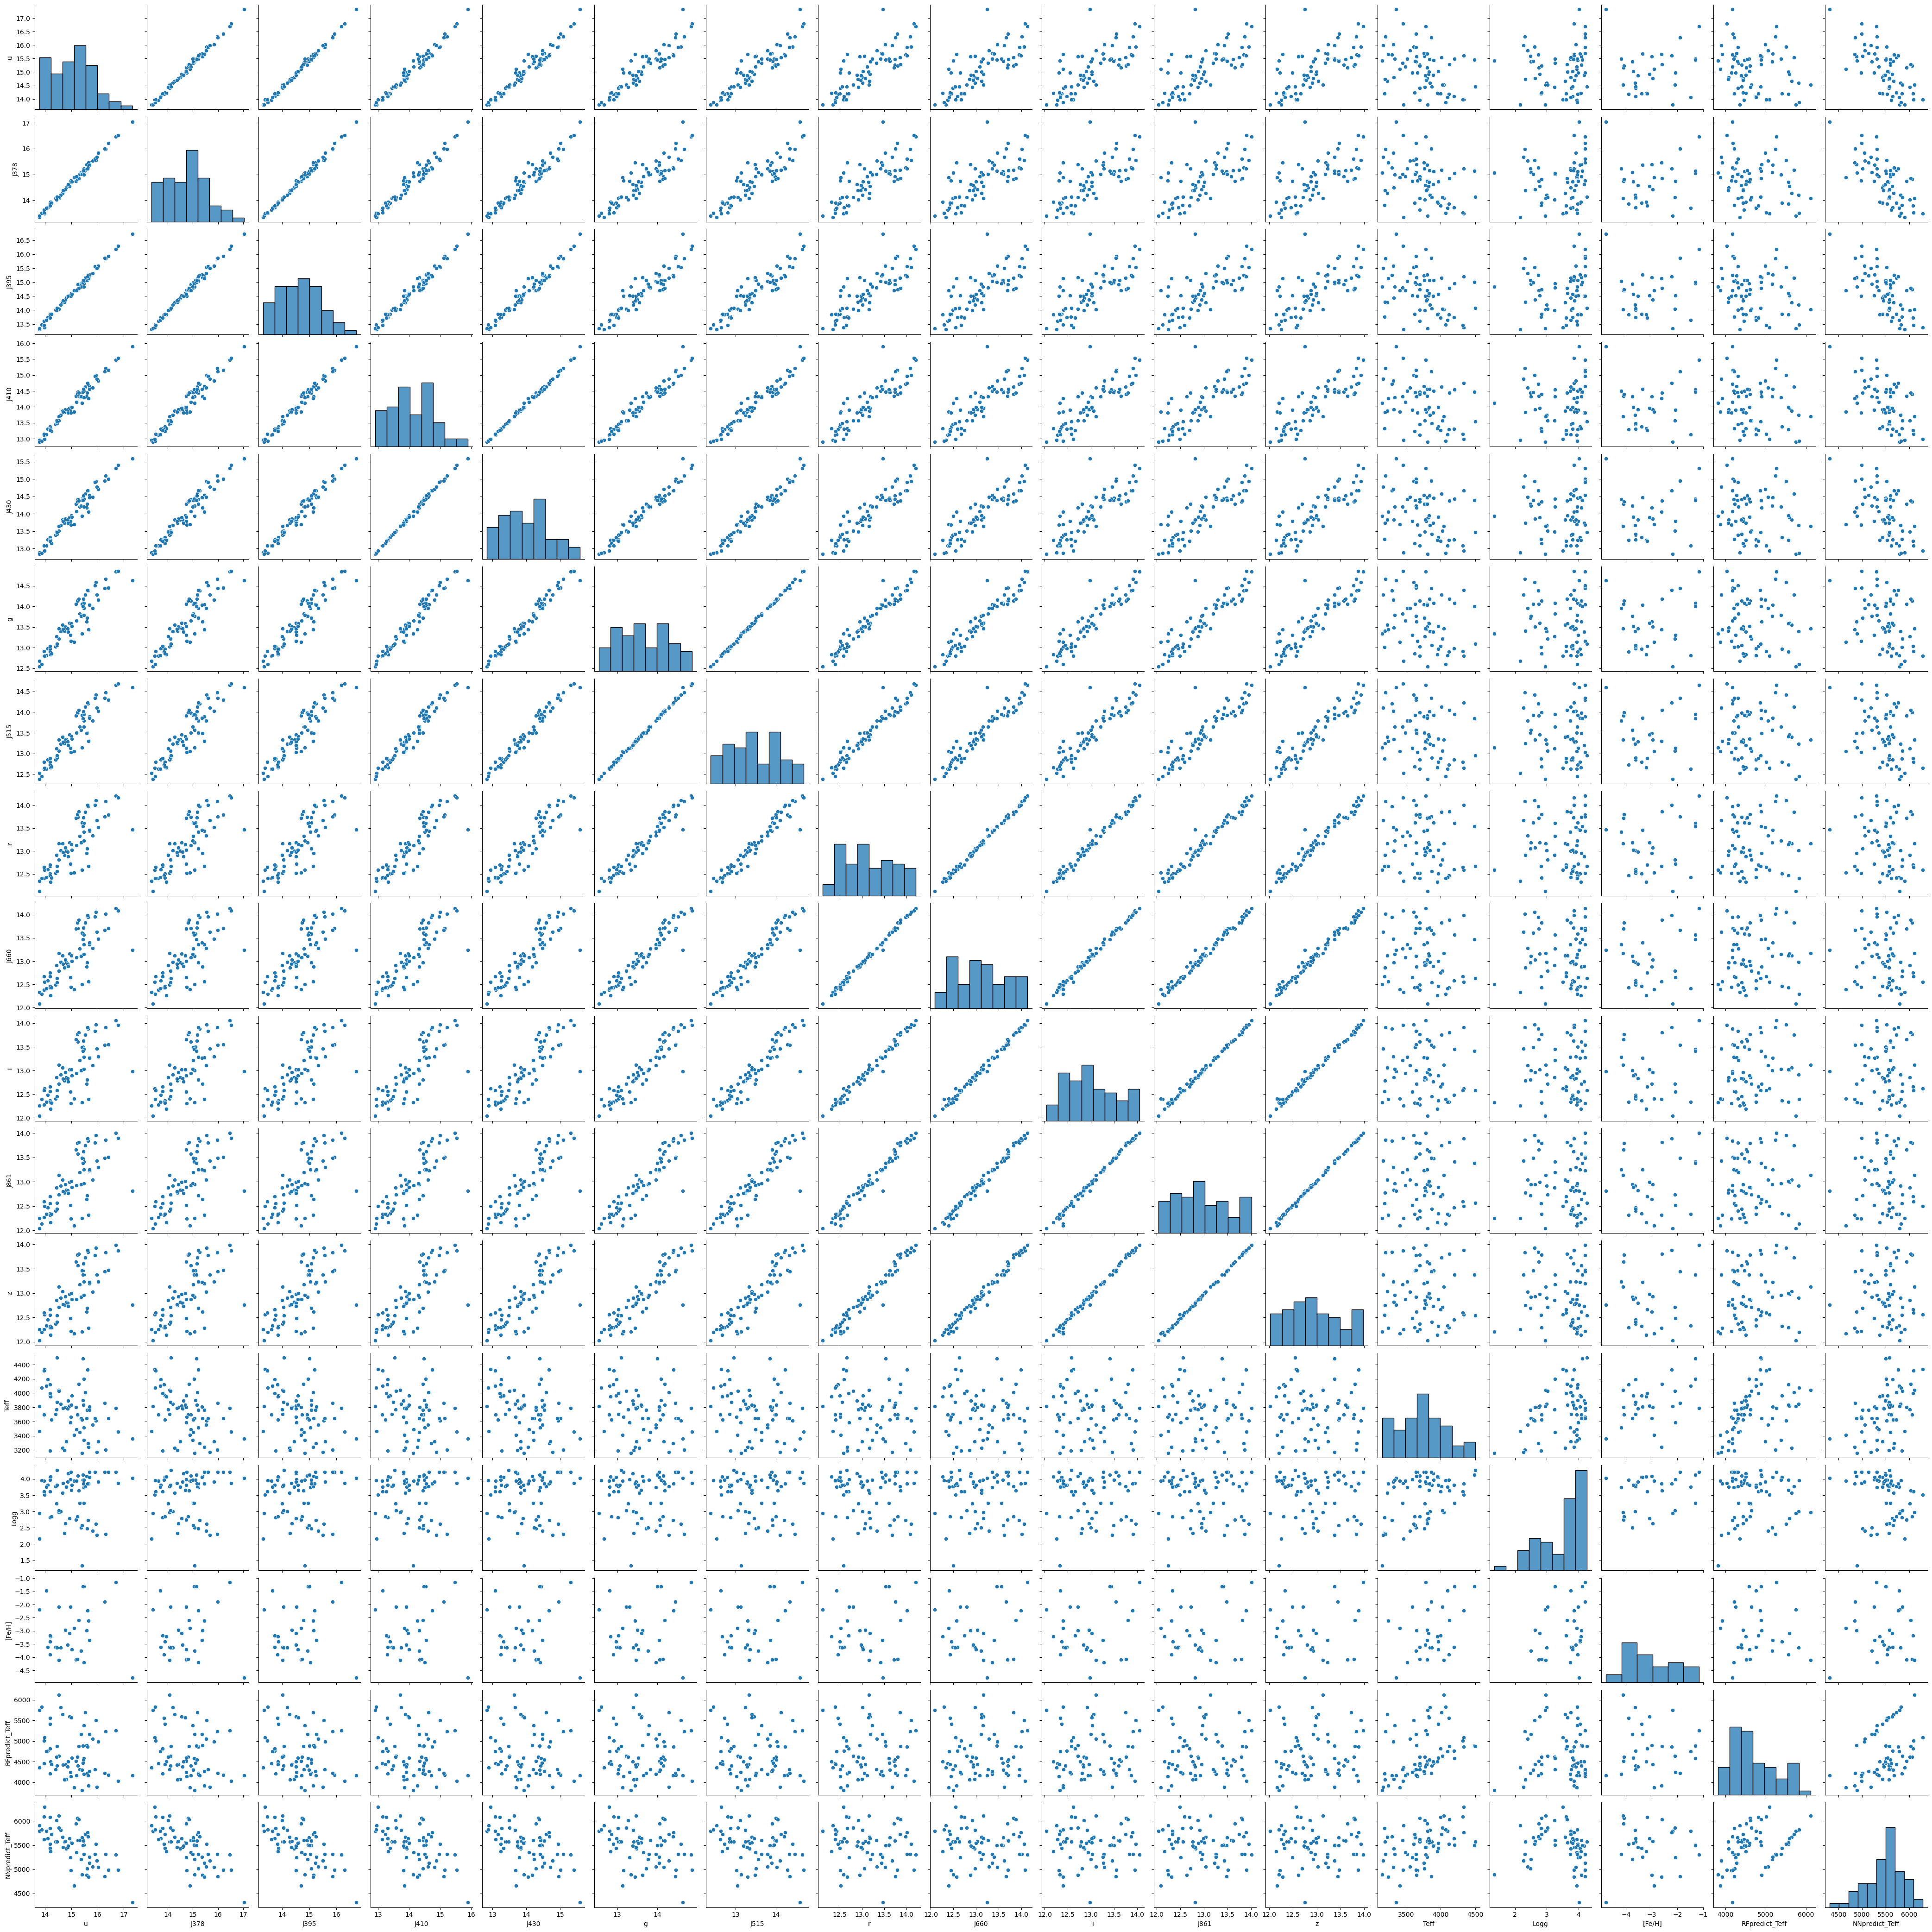

In [153]:
df_upper_col = df_upper[['u', 'J378', 'J395', 'J410', 'J430', 'g', 'J515',
       'r', 'J660', 'i', 'J861', 'z', 'Teff', 'Logg', '[Fe/H]', 
        'RFpredict_Teff', 'NNpredict_Teff']]

sns.pairplot(df_upper_col)
plt.savefig("outlier.png")

In [160]:
print("Min Teff Galha:", df_upper["Teff"].min())
print("Mix Teff Galha:", df_upper["Teff"].max())

print("Min Teff Galha-predit:", df_upper["NNpredict_Teff"].min())
print("Mix Teff Galha-predict:", df_upper["NNpredict_Teff"].max())


Min Teff Galha: 3156.71
Mix Teff Galha: 4497.22
Min Teff Galha-predit: 4314.0005
Mix Teff Galha-predict: 6287.685


In [157]:
# Saving as CSV
df_upper.to_csv('outliers-galah.csv', index=False)  # Set index=False if you don't want to save the index

### GAIA

In [161]:
dfgaia = pd.read_csv('outliers-galah-GAIA.csv')

In [163]:
for i in dfgaia.columns:
    print(i)

#ID
RA
DEC
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
Teff
Logg
[Fe/H]
Line_Label
split
Teff.1
RFpredict_Teff
NNpredict_Teff
DR3Name
RAdeg
DEdeg
errHalfMaj
errHalfMin
errPosAng
SolID
Source
RandomI
e_RAdeg
e_DEdeg
Plx
e_Plx
RPlx
PM
pmRA
e_pmRA
pmDE
e_pmDE
RADEcor
RAPlxcor
RApmRAcor
RApmDEcor
DEPlxcor
DEpmRAcor
DEpmDEcor
PlxpmRAcor
PlxpmDEcor
pmRApmDEcor
NAL
NAC
NgAL
NbAL
gofAL
chi2AL
epsi
sepsi
Solved
APF
nueff
pscol
e_pscol
RApscolCorr
DEpscolCorr
PlxpscolCorr
pmRApscolCorr
pmDEpscolCorr
MatchObsA
Nper
amax
MatchObs
IPDgofha
IPDgofhp
IPDfmp
IPDfow
RUWE
Dup
o_Gmag
FG
e_FG
RFG
Gmag
e_Gmag
o_BPmag
FBP
e_FBP
RFBP
BPmag
e_BPmag
o_RPmag
FRP
e_FRP
RFRP
RPmag
e_RPmag
E(BP/RP)
NBPcont
NBPblend
NRPcont
NRPblend
Mode
BP-RP
BP-G
G-RP
RV
e_RV
n_RV
o_RV
o_RVd
RVNper
RVS/N
RVgof
RVchi2
RVTdur
RVamp
RVtempTeff
RVtemplogg
RVtemp[Fe/H]
Vatmparam
vbroad
e_Vbroad
o_Vbroad
GRVSmag
e_GRVSmag
o_GRVSmag
RVSS/N
VarFlag
PQSO
PGal
PSS
Teff_x
b_Teff_x
B_Teff_xa
logg_x
b_logg_x
B_logg_xa
[Fe/H]_x
b_[Fe/H]_x
B_[

In [164]:
print("Min Teff GAIA:",dfgaia["Teff_x"].min())
print("Mix Teff GAIA:", dfgaia["Teff_x"].max())



Min Teff GAIA: 4362.3
Mix Teff GAIA: 6575.9


#### TESS

In [165]:
dftess = pd.read_csv('outliers-galah-TESS.csv')

In [167]:
for i in dftess.columns:
    print(i)

#ID
RA
DEC
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
Teff
Logg
[Fe/H]
Line_Label
split
Teff.1
RFpredict_Teff
NNpredict_Teff
TIC
RAJ2000
DEJ2000
errHalfMaj
errHalfMin
errPosAng
HIP
TYC
UCAC4
2MASS
objID
WISEA
GAIA
APASS
KIC
S/G
Ref
r_Pos
pmRA
e_pmRA
pmDE
e_pmDE
r_pm
Plx
e_Plx
r_Plx
Bmag
e_Bmag
Vmag
e_Vmag
umag
e_umag
gmag_x
e_gmag_x
rmag
e_rmag
imag
e_imag
zmag
e_zmag
Jmag
e_Jmag
Hmag
e_Hmag
Kmag
e_Kmag
q_2MASS
W1mag
e_W1mag
W2mag
e_W2mag
W3mag
e_W3mag
W4mag
e_W4mag
Gmag_xa
e_Gmag_xa
Tmag
e_Tmag
f_Tmag
Flag
Teff_x
s_Teff
logg_x
s_logg
[M/H]
e_[M/H]
Rad
s_Rad
Mass
s_Mass
rho
s_rho
LClass
Lum
s_Lum
Dist
s_Dist
E(B-V)
s_E(B-V)
Ncont
Rcont
Disp
m_TIC
Prior
e_E(B-V)_x
E_E(B-V)_xa
f_E(B-V)
e_Mass_x
E_Mass_xa
e_Rad_x
E_Rad_xa
e_rho_x
E_rho_xa
e_logg_x
E_logg_xa
e_Lum_x
E_Lum_xa
e_Dist_x
E_Dist_xa
r_Dist
e_Teff_x
E_Teff_xa
r_Teff
BPmag
e_BPmag
RPmag
e_RPmag
q_Gaia
r_Vmag
r_Bmag
Clist
e_RAJ2000
e_DEJ2000
RAOdeg
DEOdeg
e_RAOdeg
e_DEOdeg
RadFl
WDFl
ID
angDist


In [168]:
print("Min Teff TESS:",dftess["Teff_x"].min())
print("Mix Teff TESS:", dftess["Teff_x"].max())



Min Teff TESS: 4328.5
Mix Teff TESS: 6319.0


# RF

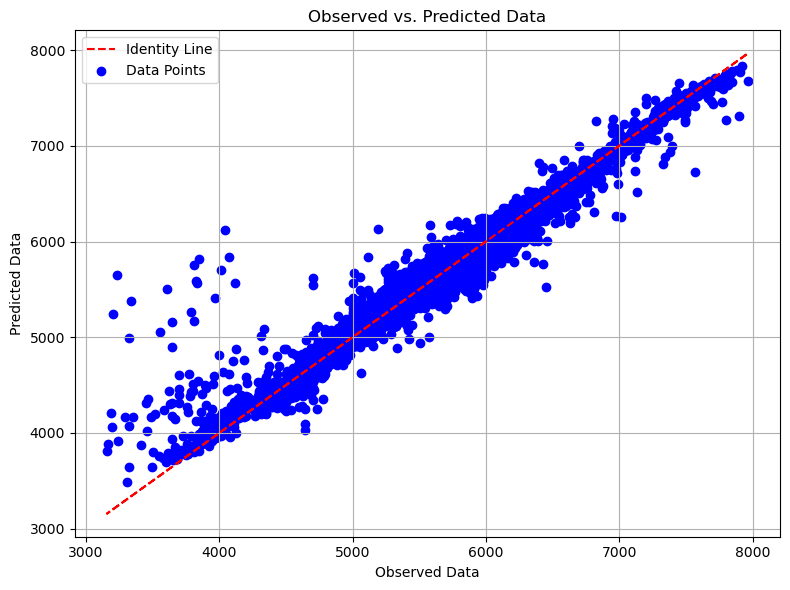

In [155]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Teff"], df["RFpredict_Teff"], color='blue', label='Data Points')
plt.plot(df["Teff"], df["Teff"], color='red', linestyle='--', label='Identity Line')

plt.title('Observed vs. Predicted Data')
plt.xlabel('Observed Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()